# 1. Imports

In [ ]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from sklearn.linear_model import LinearRegression

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm


# 2. Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
features_with_polarization_20 = pd.read_pickle('/content/drive/MyDrive/final_features_scores_20_new.pkl')
features_with_polarization_20

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,topic,main_category,sub_category,Stadt,Former Country,City Classification,net_sentiment_score,positivity_sentiment,negativity_sentiment,polarizing
100032,1066957,20,1,gabriele,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,katzmarek,25,Member of Parliament,None,11004325,...,No Topic,no topic,None,Marl,former BRD,Medium City,0.285714,0.285714,0.000000,False
100033,1066959,20,1,gabriele,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,katzmarek,25,Member of Parliament,None,11004325,...,Binnenhandel: Verbraucherschutz,Domestic Trade,Verbraucherschutz,Marl,former BRD,Medium City,0.134146,0.176829,0.042683,False
100034,1066961,20,1,stefan,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,müller,5,Member of Parliament,None,11003597,...,Recht & Kriminalität,Law & Crime,None,NaN,NaN,NaN,0.074219,0.128906,0.054688,False
100035,1066963,20,1,britta,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,haßelmann,4,Member of Parliament,None,11003764,...,Arbeit,Work,None,Straelen,former BRD,Small City,0.092527,0.138790,0.046263,False
100036,1066965,20,1,marco,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,buschmann,15,Minister,Bundesminister der Justiz,11004023,...,Recht & Kriminalität,Law & Crime,None,Gelsenkirchen,former BRD,Large City,0.137255,0.183007,0.045752,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133159,1094067,20,201,janine,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,wissler,7,Member of Parliament,None,11005260,...,No Topic,no topic,None,NaN,NaN,NaN,-0.009132,0.109589,0.118721,True
133160,1094069,20,201,tino,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,sorge,5,Member of Parliament,None,11004409,...,No Topic,no topic,None,Ilmenau,former GDR,Medium City,0.090909,0.155425,0.064516,True
133161,1094071,20,201,thomas,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,lutze,7,Member of Parliament,None,11004103,...,Arbeit: Mindestlohn,Work,Mindestlohn,Elsterwerda,former GDR,Small City,0.063492,0.154762,0.091270,False
133162,1094073,20,201,wilfried,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,oellers,5,Member of Parliament,None,11004365,...,Sozialpolitik,Social Policy,None,Mönchengladbach,former BRD,Large City,0.055385,0.132308,0.076923,True


# 3. Regression Analysis


In [ ]:
regression_df = features_with_polarization_20[features_with_polarization_20['electoral_term'] == 20][['politician_id','faction', 'age',
                                                            'tenure','gender', 'City Classification',
                                                            'Former Country', 'main_category', 'polarizing']]

# create dummies
regression_df_dummies = pd.get_dummies(regression_df, columns = ['faction', 'gender', 'City Classification', 'Former Country', 'main_category'])

# drop column politician id
regression_df_dummies = regression_df_dummies.drop(columns=['politician_id'])
regression_df_dummies.dropna(inplace = True)

regression_df_dummies = regression_df_dummies.astype(int)

# convert to integer
regression_df_dummies

,age,tenure,polarizing,faction_AfD,faction_BSW,faction_Bündnis 90/Die Grünen,faction_CDU/CSU,faction_DIE LINKE.,faction_FDP,faction_Fraktionslos,...,main_category_Housing,main_category_Law & Crime,main_category_Public Administration,main_category_Reunification,main_category_Social Policy,main_category_Sports,main_category_Technology,main_category_Transport,main_category_Work,main_category_no topic
100032,61,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100033,61,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100034,46,18,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
100035,60,15,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100036,44,11,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133159,43,2,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
133160,49,10,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
133161,55,14,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
133162,49,10,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# calculate correlations with polarizing
regression_df_dummies['polarizing'] = regression_df_dummies['polarizing'].astype(float)
correlations = regression_df_dummies.corr()['polarizing'].sort_values(ascending=False)
correlations

,polarizing
polarizing,1.000000
faction_AfD,0.329932
faction_DIE LINKE.,0.094405
gender_männlich,0.073217
faction_BSW,0.050157
faction_Fraktionslos,0.044898
age,0.044784
Former Country_former GDR,0.038399
main_category_Energy,0.019787
faction_CDU/CSU,0.013727


In [ ]:
features_only_filtered = regression_df_dummies.drop(columns=['gender_weiblich', 'Former Country_former GDR', 'main_category_no topic'])

Y = features_only_filtered['polarizing']

X = features_only_filtered.drop(columns=['polarizing'])

# Define the independent variables, adding an intercept term
X = sm.add_constant(X)

# Create a GLM model with a binomial family and include an L2 penalty
# The 'alpha' parameter controls the strength of the regularization
# Lower values of alpha mean less regularization
model = sm.GLM(Y, X, family=sm.families.Binomial(), link=sm.genmod.families.links.logit(), alpha=0.1)

# Fit the model
result = model.fit()

# Print the summary of the model
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['link', 'alpha']
  warnings.warn(msg, ValueWarning)


                 Generalized Linear Model Regression Results                  
Dep. Variable:             polarizing   No. Observations:                32113
Model:                            GLM   Df Residuals:                    32077
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13003.
Date:                Sat, 07 Dec 2024   Deviance:                       26006.
Time:                        10:02:34   Pearson chi2:                 3.22e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.1353
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
high_p_value_cols = result.pvalues[result.pvalues > 0.05].index.tolist()

# Drop these columns from the DataFrame
X_filtered = X.drop(columns=high_p_value_cols)
X_filtered = X_filtered.drop(columns= ["City Classification_Large City", "City Classification_Medium City", "City Classification_Small City", "Former Country_former BRD"] )


# Add a constant to the model since statsmodels' OLS doesn't include it by default
X_filtered = sm.add_constant(X_filtered)

# Fit the logistic regression model again
model_filtered = sm.Logit(Y, X_filtered).fit()

# Print the summary of the new model
print(model_filtered.summary())

Optimization terminated successfully.
         Current function value: 0.405556
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             polarizing   No. Observations:                32113
Model:                          Logit   Df Residuals:                    32099
Method:                           MLE   Df Model:                           13
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                  0.1508
Time:                        10:02:42   Log-Likelihood:                -13024.
converged:                       True   LL-Null:                       -15337.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.6833      0.113     -6.061      0.

In [ ]:
coefficients = model_filtered.params
p_values = model_filtered.pvalues

data = {
    'Variable': coefficients.index,
    'Coefficient': coefficients.values,
    'P-Value': p_values.values
}
coeff_df = pd.DataFrame(data)

coeff_df['Type'] = coeff_df['Variable'].apply(
    lambda x: 'Faction' if 'faction' in x
              else 'Topic' if 'main_category' in x
              else 'age' if 'age' in x
              else 'gender_männlich' if 'gender_männlich' in x
              else 'Other'
)

significant_coeffs = coeff_df[coeff_df['P-Value'] < 0.05]

impact_summary_mean = significant_coeffs.groupby('Type')['Coefficient'].apply(lambda x: x.abs().mean())

print(impact_summary_mean)


Type
Faction            1.022932
Other              0.683281
Topic              0.237606
age                0.013887
gender_männlich    0.160394
Name: Coefficient, dtype: float64


In [ ]:
impact_summary_sum = significant_coeffs.groupby('Type')['Coefficient'].apply(lambda x: x.abs().sum())

# Ausgabe
print(impact_summary_sum)

Type
Faction            8.183453
Other              0.683281
Topic              0.712818
age                0.013887
gender_männlich    0.160394
Name: Coefficient, dtype: float64


# 4. Overall Analysis

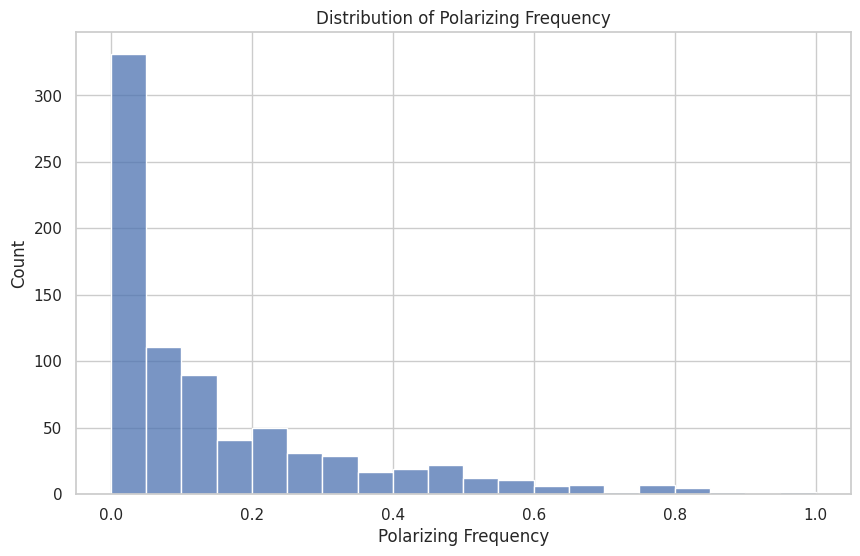

In [ ]:
# group by politician id
distribution_polarizing_frequency = features_with_polarization_20.groupby(['politician_id']).agg({'polarizing': 'sum', 'id': 'count'}).reset_index()

distribution_polarizing_frequency['frequency'] = distribution_polarizing_frequency['polarizing'] / distribution_polarizing_frequency['id']

features_with_polarization_20

# drop nan values and drop politician_id -1
distribution_polarizing_frequency = distribution_polarizing_frequency.dropna()
distribution_polarizing_frequency = distribution_polarizing_frequency[distribution_polarizing_frequency['politician_id'] != -1]

# show histogram of frequency distribution
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(distribution_polarizing_frequency['frequency'], bins=20)
plt.title('Distribution of Polarizing Frequency')
plt.xlabel('Polarizing Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.show()

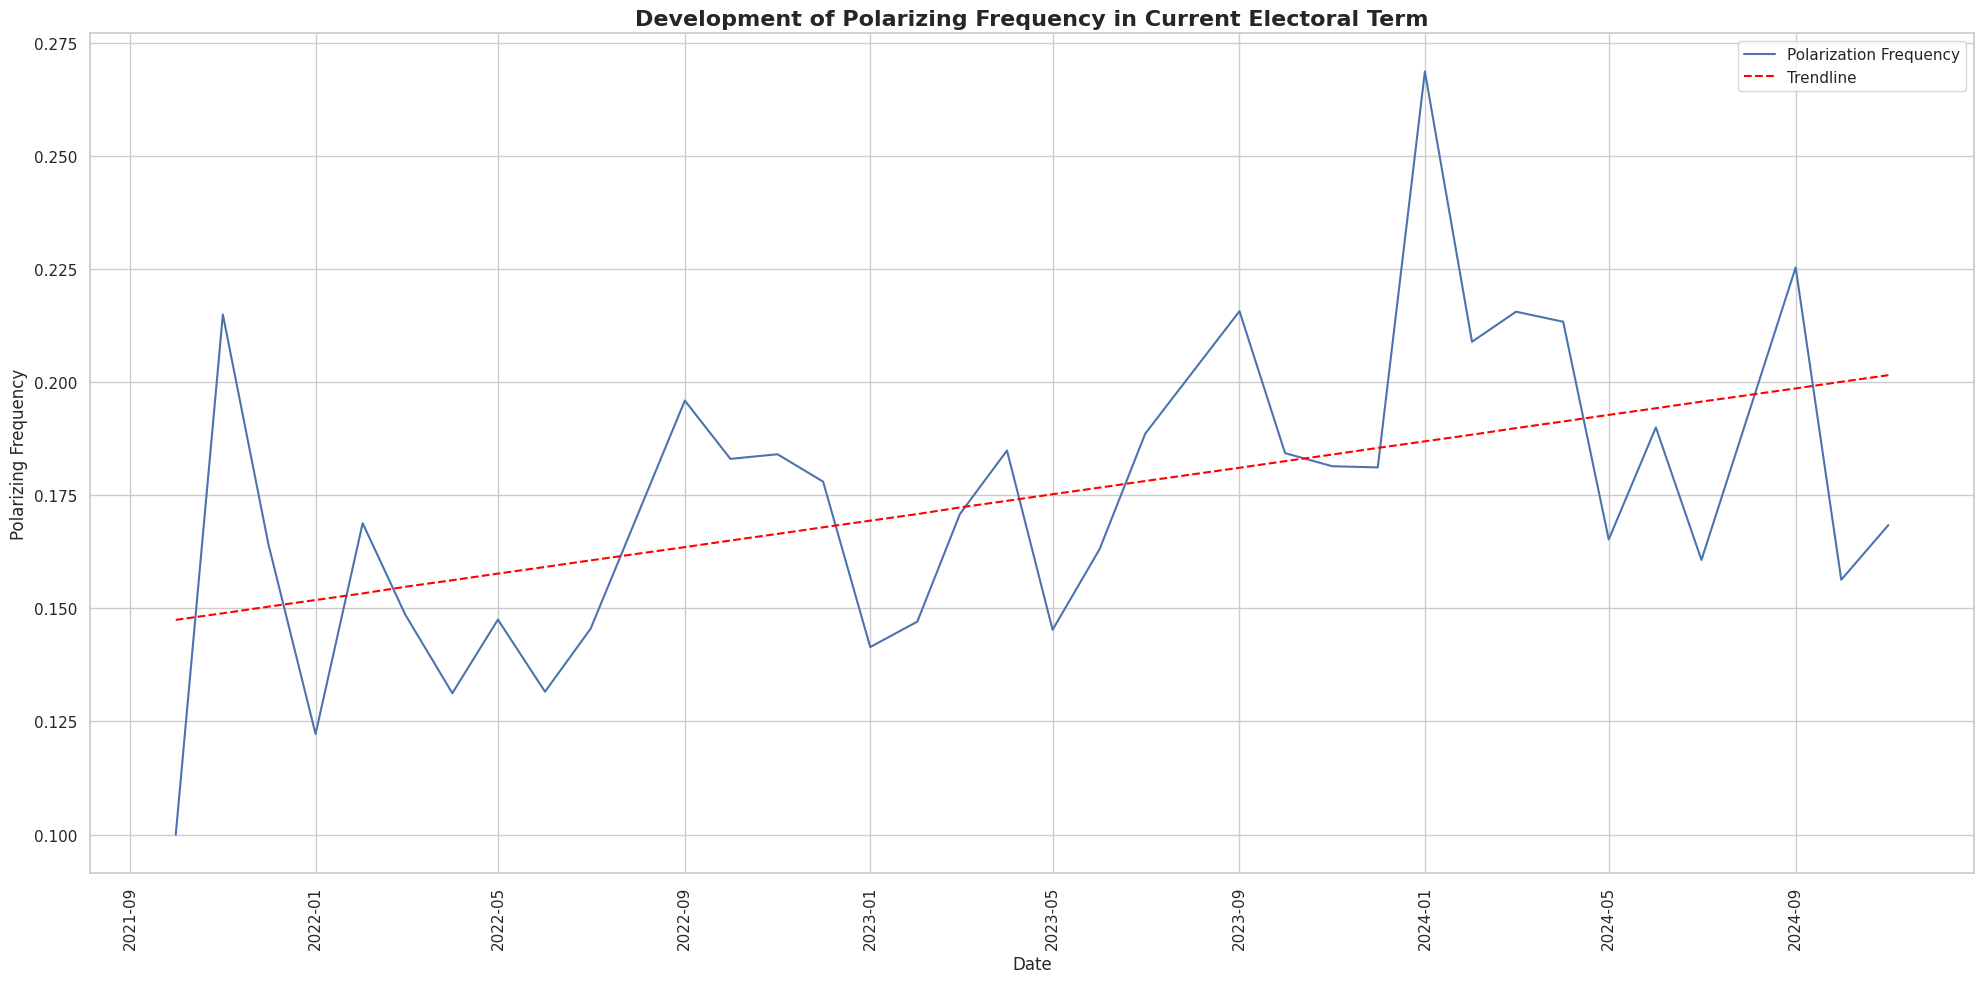

In [ ]:
features_with_polarization_20['month_year'] = pd.to_datetime(features_with_polarization_20['date']).dt.to_period('M')

features_with_polarization_20_grouped = features_with_polarization_20.groupby('month_year').agg({'polarizing':'sum', 'id':'count'}).reset_index()

features_with_polarization_20_grouped['polarizing_frequency'] = features_with_polarization_20_grouped['polarizing']/features_with_polarization_20_grouped['id']

features_with_polarization_20_grouped['month_year'] = features_with_polarization_20_grouped['month_year'].dt.to_timestamp()

features_with_polarization_20_grouped['time_index'] = (features_with_polarization_20_grouped['month_year'].dt.year - features_with_polarization_20_grouped['month_year'].dt.year.min()) * 12 + features_with_polarization_20_grouped['month_year'].dt.month

X = features_with_polarization_20_grouped['time_index'].values.reshape(-1, 1)
y = features_with_polarization_20_grouped['polarizing_frequency'].values

model = LinearRegression()
model.fit(X, y)
sns.set_theme(style="whitegrid")

trendline = model.predict(X)

# Zuwachsrate berechnen (in %)
growth_rate_percent = model.coef_[0] * 100

# Plot erstellen
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))

# Originalwerte und Trendlinie plotten
plt.plot(features_with_polarization_20_grouped['month_year'], features_with_polarization_20_grouped['polarizing_frequency'], label='Polarization Frequency')
plt.plot(features_with_polarization_20_grouped['month_year'], trendline, label='Trendline', color='red', linestyle='--')

# Achsenbeschriftungen und Titel
plt.xlabel('Date')
plt.ylabel('Polarizing Frequency')
plt.title('Development of Polarizing Frequency in Current Electoral Term', fontsize=16, weight='bold')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
slope = model.coef_[0]
slope

0.0014612134763312024

In [ ]:
#get most polarizing politicans
polarizing_by_politician = features_with_polarization_20.groupby('politician_id').agg(
    total_polarizing=('polarizing', 'sum'),
    total_speeches=('id', 'count'),
    first_name=('first_name', 'first'),
    last_name=('last_name', 'first'),
    faction = ('faction', 'first')
).reset_index()

polarizing_by_politician['polarizing_frequency'] = (
    polarizing_by_politician['total_polarizing'] / polarizing_by_politician['total_speeches']
)

polarizing_by_politician = polarizing_by_politician[polarizing_by_politician["total_speeches"] > 3]

polarizing_by_politician = polarizing_by_politician.sort_values(
    by='polarizing_frequency', ascending=False
)

top_5_polarizing_politicians = polarizing_by_politician.head(5)

top_5_polarizing_politicians


,politician_id,total_polarizing,total_speeches,first_name,last_name,faction,polarizing_frequency
346,11004739,4,4,jochen,haug,AfD,1.000000
321,11004698,51,59,gottfried,curio,AfD,0.864407
418,11004862,18,21,martin erwin,renner,AfD,0.857143
295,11004662,34,40,bernd,baumann,AfD,0.850000
685,11005209,28,33,eugen,schmidt,AfD,0.848485


# 5. Analysis by parties

## 5.1 Analysis by all Parties

In [ ]:
# Define color map for factions
color_map = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'DIE LINKE.': 'pink',
    'AfD': 'blue',
    'BSW': 'purple'
}


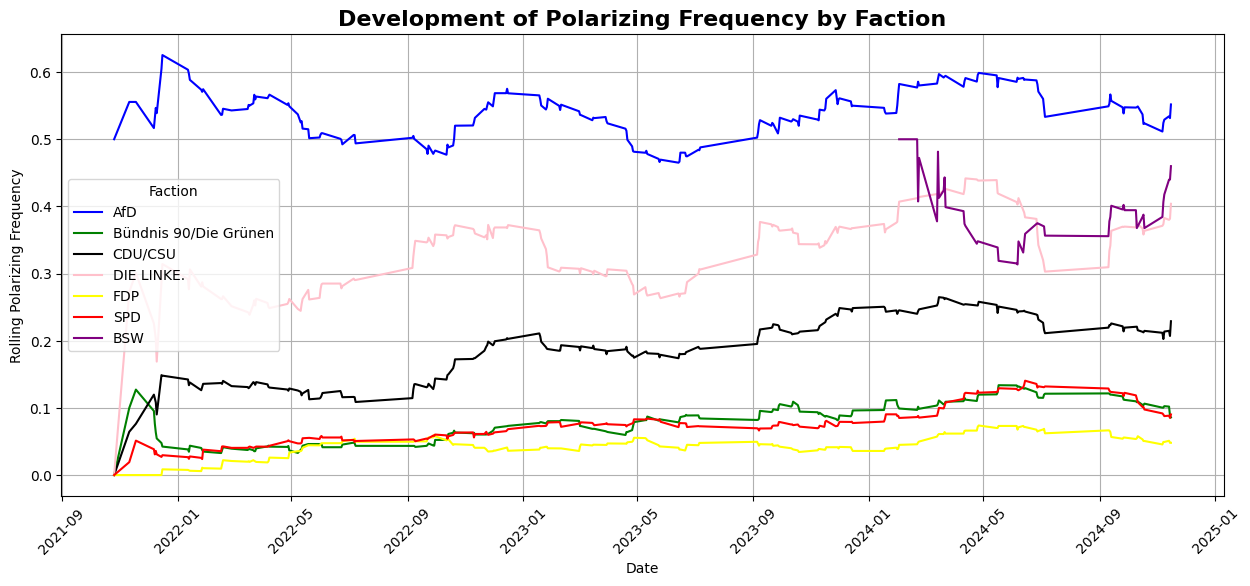

In [ ]:
features_with_polarization_20_by_party = features_with_polarization_20[features_with_polarization_20['faction'] != 'Fraktionslos']


# Group by 'date' and 'status', then calculate the polarizing frequency
grouped_by_party = features_with_polarization_20_by_party.groupby(['date', 'faction']).agg({
    'polarizing': 'sum',
    'id': 'count'
})
grouped_by_party['frequency'] = grouped_by_party['polarizing'] / grouped_by_party['id']


# Reset index for plotting
grouped_by_party = grouped_by_party.reset_index()
grouped_by_party['date'] = pd.to_datetime(grouped_by_party['date'])

# Applying a 30-day rolling average for smoothing, grouped by status
grouped_by_party['rolling_frequency_30'] = grouped_by_party.groupby('faction')['frequency'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Plotting the rolling average of polarizing frequency by governing status over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='rolling_frequency_30', hue='faction', data=grouped_by_party, palette=color_map)
plt.title('Development of Polarizing Frequency by Faction', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Polarizing Frequency')
plt.xticks(rotation=45)
plt.legend(title='Faction')
plt.grid(True)
plt.show()

In [ ]:
features_with_polarization_20_by_party = features_with_polarization_20[(features_with_polarization_20['faction'] != 'Fraktionslos')]

features_with_polarization_20_by_party = features_with_polarization_20.groupby("faction").agg({
    'polarizing': 'sum',
    'id': 'count'
}).reset_index()

features_with_polarization_20_by_party['frequency'] = features_with_polarization_20_by_party['polarizing'] / features_with_polarization_20_by_party['id']

features_with_polarization_20_by_party = features_with_polarization_20_by_party.sort_values(by = "frequency", ascending = False)
features_with_polarization_20_by_party

,faction,polarizing,id,frequency
0,AfD,2129,4111,0.517879
1,BSW,81,184,0.440217
6,Fraktionslos,123,352,0.349432
4,DIE LINKE.,713,2245,0.317595
3,CDU/CSU,1499,7744,0.193569
7,SPD,545,6813,0.079994
2,Bündnis 90/Die Grünen,440,5513,0.079811
5,FDP,190,4261,0.044590


In [ ]:
features_with_polarization_20['month_year'] = pd.to_datetime(features_with_polarization_20['date']).dt.to_period('M')

features_with_polarization_20_grouped_faction_trend = features_with_polarization_20.copy()
features_with_polarization_20_grouped_faction_trend['time_index'] = (
    (features_with_polarization_20_grouped_faction_trend['month_year'].dt.year - features_with_polarization_20_grouped_faction_trend['month_year'].dt.year.min()) * 12
    + features_with_polarization_20_grouped_faction_trend['month_year'].dt.month
)

features_with_polarization_20_grouped_faction_trend = features_with_polarization_20_grouped_faction_trend.groupby(['faction', 'time_index']).agg({
    'polarizing': 'sum',
    'id': 'count'
}).reset_index()

# Calculate 'frequency' (polarizing / id)
features_with_polarization_20_grouped_faction_trend['frequency'] = features_with_polarization_20_grouped_faction_trend['polarizing'] / features_with_polarization_20_grouped_faction_trend['id']


In [ ]:
# Initialize a dictionary to store the trend results
trend_results = {}

# Loop through each faction to fit a linear regression model
for faction, group in features_with_polarization_20_grouped_faction_trend.groupby('faction'):
    X = group['time_index'].values.reshape(-1, 1)
    y = group['frequency'].values  # Corrected column name to 'frequency'

    model = LinearRegression()
    model.fit(X, y)

    # Store the trend coefficient for each faction
    trend_results[faction] = model.coef_[0]

# Convert the trend results into a DataFrame
trend_df = pd.DataFrame(list(trend_results.items()), columns=['faction', 'trend_4_years'])

# Sort by 'trend_4_years' in descending order
trend_df = trend_df.sort_values(by='trend_4_years', ascending=False).reset_index(drop=True)

# Print the results
print("Trend over the last 4 years for each faction:")
print(trend_df)


Trend over the last 4 years for each faction:
                 faction  trend_4_years
0                    BSW       0.020561
1             DIE LINKE.       0.004688
2                CDU/CSU       0.003719
3                    SPD       0.001764
4  Bündnis 90/Die Grünen       0.001320
5                    FDP       0.000474
6                    AfD       0.000313
7           Fraktionslos      -0.010994


## 5.2 Analysis Governing vs. Opposition

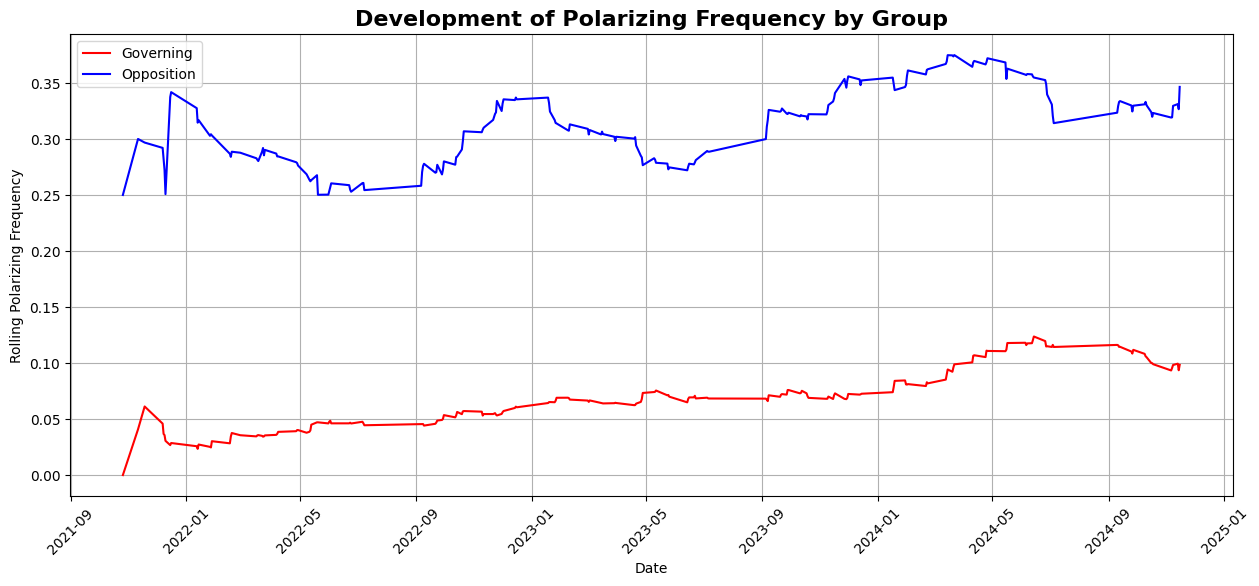

In [ ]:
governing_parties = ['SPD', 'Bündnis 90/Die Grünen', 'FDP', 'BSW']
opposition_parties = ['AfD', 'DIE LINKE.','CDU/CSU']

features_with_polarization_20_partygroup = features_with_polarization_20[features_with_polarization_20['faction'] != 'Fraktionslos']

features_with_polarization_20_partygroup['party_group'] = features_with_polarization_20_partygroup['faction'].apply(
    lambda x: 'Governing' if x in governing_parties else ('Opposition' if x in opposition_parties else 'Other'))

features_with_polarization_20_partygroup = features_with_polarization_20_partygroup[
    features_with_polarization_20_partygroup['party_group'] != 'Other']

# Group by 'date' and 'status', then calculate the polarizing frequency
grouped_by_status = features_with_polarization_20_partygroup.groupby(['date', 'party_group']).agg({
    'polarizing': 'sum',
    'id': 'count'
})
grouped_by_status['frequency'] = grouped_by_status['polarizing'] / grouped_by_status['id']


# Reset index for plotting
grouped_by_status = grouped_by_status.reset_index()
grouped_by_status['date'] = pd.to_datetime(grouped_by_status['date'])

# Applying a 30-day rolling average for smoothing, grouped by status
grouped_by_status['rolling_frequency_30'] = grouped_by_status.groupby('party_group')['frequency'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Plotting the rolling average of polarizing frequency by governing status over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='rolling_frequency_30',data=grouped_by_status, hue='party_group', palette={'Governing': 'red', 'Opposition': 'blue'})
plt.title('Development of Polarizing Frequency by Group', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Polarizing Frequency')
plt.xticks(rotation=45)
plt.legend(title='')
plt.grid(True)
plt.show()

# 6. Demographics

## 6.1 By Gender


In [ ]:
# group by gender, sum polarizing, vizaulize
features_with_polarization_20_gender = features_with_polarization_20.groupby('gender').agg({'polarizing':'sum', 'id':'count'}).reset_index()

features_with_polarization_20_gender['polarizing_frequency'] = features_with_polarization_20_gender['polarizing']/features_with_polarization_20_gender['id']

features_with_polarization_20_gender

,gender,polarizing,id,polarizing_frequency
0,männlich,4425,21716,0.203767
1,weiblich,1488,10397,0.143118


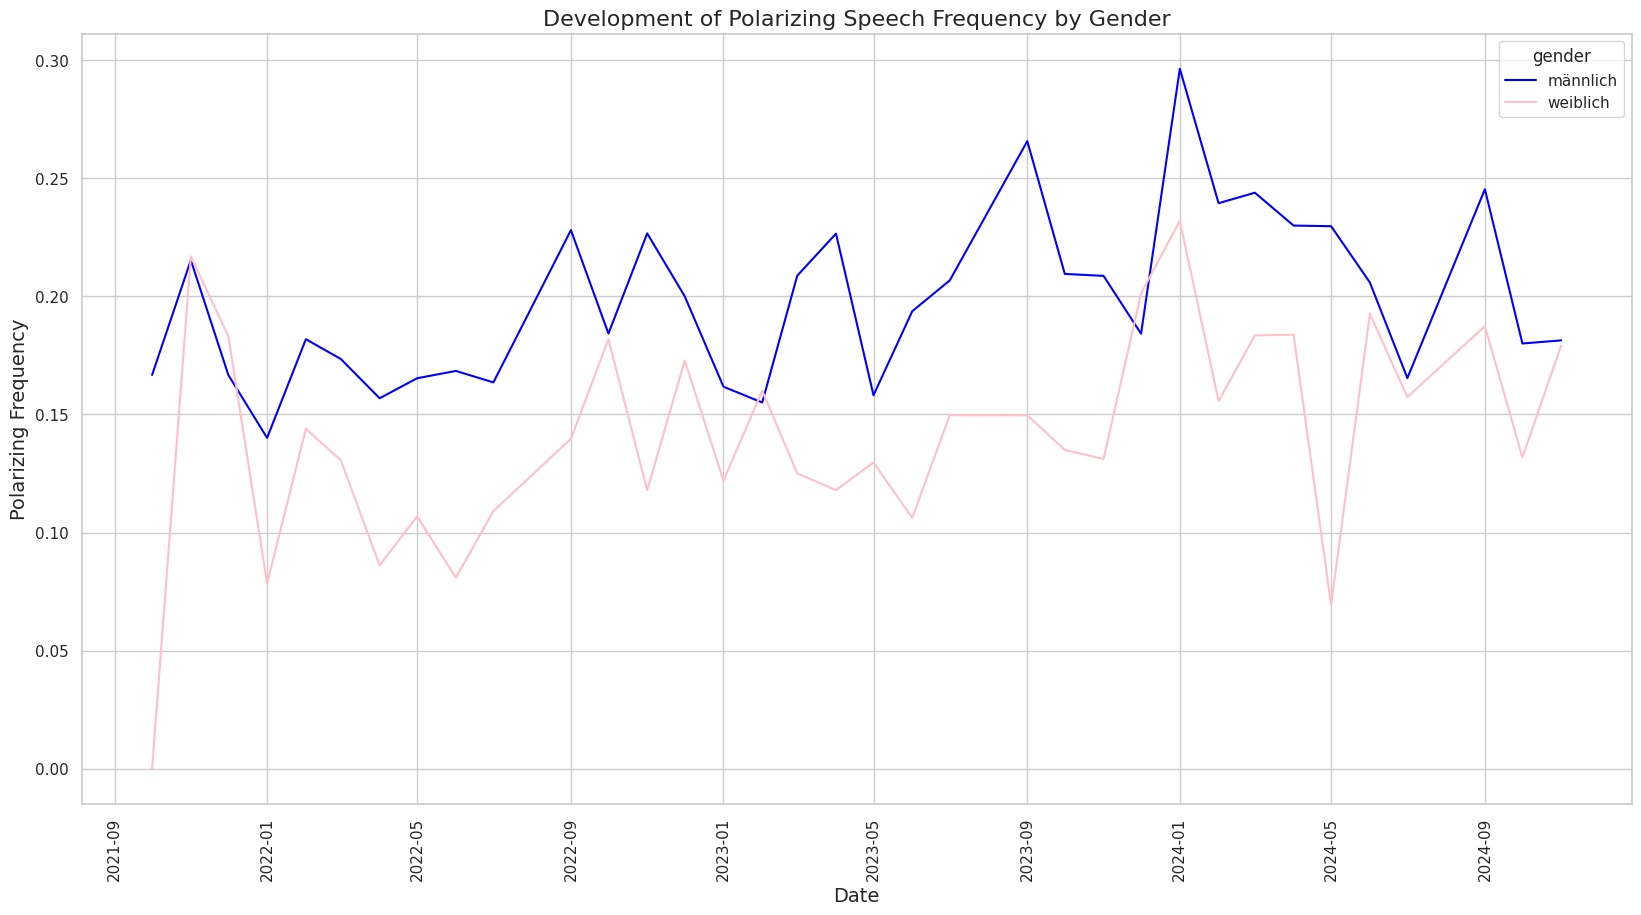

In [ ]:
features_with_polarization_20_grouped_gender = features_with_polarization_20.groupby(['month_year', 'gender']).agg({'polarizing':'sum', 'id':'count'}).reset_index()

features_with_polarization_20_grouped_gender['polarizing_frequency'] = features_with_polarization_20_grouped_gender['polarizing']/features_with_polarization_20_grouped_gender['id']

features_with_polarization_20_grouped_gender['month_year'] = features_with_polarization_20_grouped_gender['month_year'].dt.to_timestamp()

palette = {'männlich': 'blue', 'weiblich': 'pink'}
sns.set_theme(style="whitegrid")

plt.figure(figsize=(20, 10))
sns.lineplot(data=features_with_polarization_20_grouped_gender, x='month_year', y='polarizing_frequency', hue='gender', palette=palette)
plt.title("Development of Polarizing Speech Frequency by Gender", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Polarizing Frequency", fontsize=14)
plt.xticks(rotation=90)
plt.show()


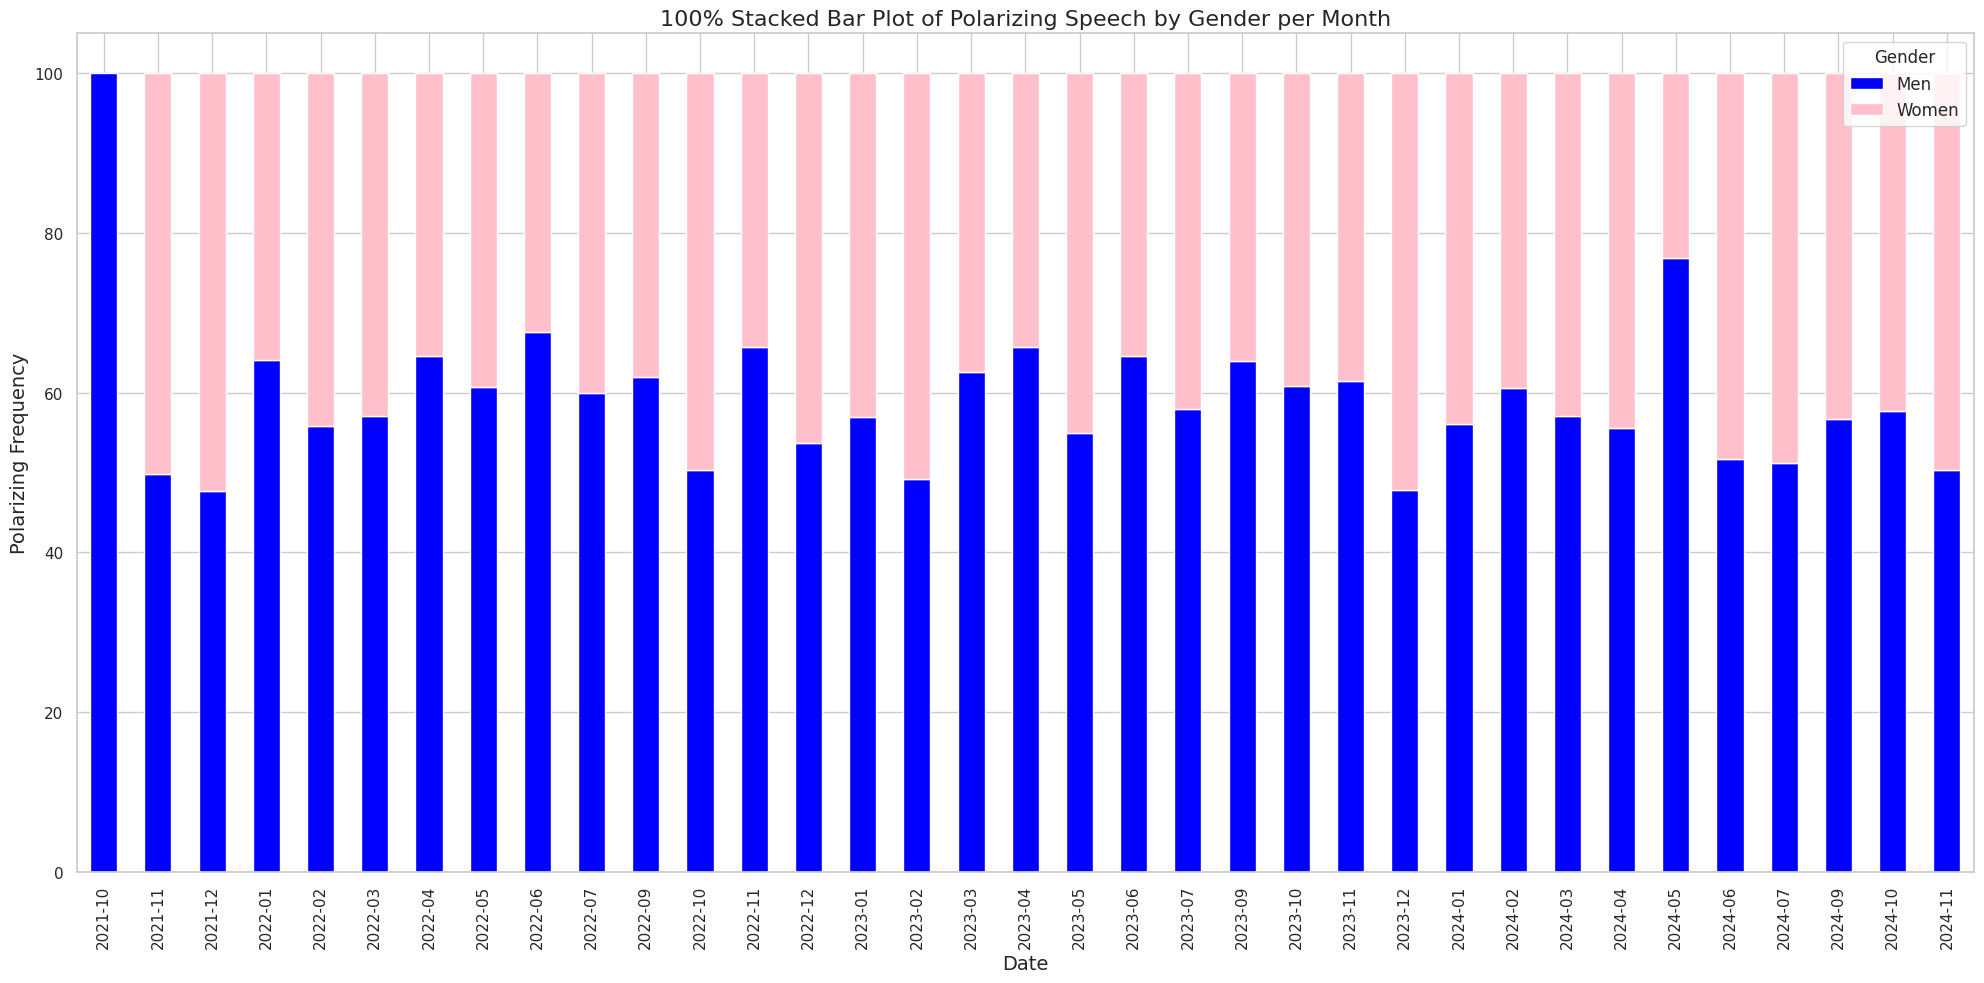

In [ ]:
# Berechne die Summe der polarisierenden Reden und die Gesamtzahl der Reden pro Monat
features_with_polarization_20_grouped_gender_stacked = features_with_polarization_20.groupby(['month_year', 'gender']).agg({'polarizing': 'sum', 'id':'count'}).reset_index()

features_with_polarization_20_grouped_gender_stacked['polarizing_frequency'] = features_with_polarization_20_grouped_gender_stacked['polarizing']/features_with_polarization_20_grouped_gender_stacked['id']

features_pivot = features_with_polarization_20_grouped_gender_stacked.pivot(index='month_year', columns='gender', values='polarizing_frequency').fillna(0)

features_pivot_percent = features_pivot.div(features_pivot.sum(axis=1), axis=0) * 100

colors = ['blue', 'pink']

features_pivot_percent.plot(kind='bar', stacked=True, color=colors, figsize=(20, 10), width= 0.5)

plt.title('100% Stacked Bar Plot of Polarizing Speech by Gender per Month', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Polarizing Frequency", fontsize=14)

plt.xticks(rotation=90)

plt.legend(title='Gender', labels=['Men', 'Women'], fontsize=12)


plt.tight_layout()
plt.show()


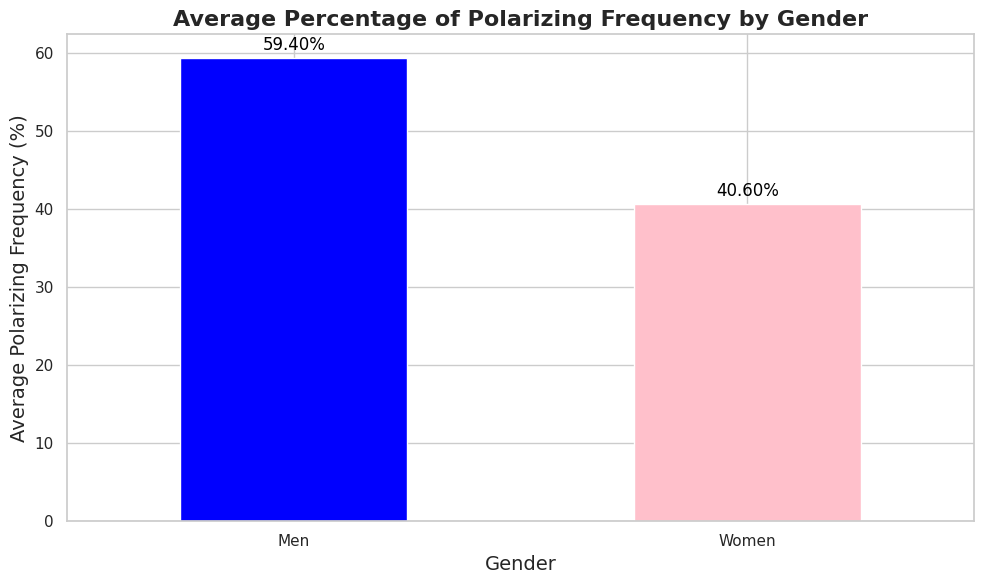

In [ ]:
average_polarizing_percent = features_pivot_percent.mean()
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
bars = average_polarizing_percent.plot(kind='bar', color=['blue', 'pink'], width=0.5)

plt.title('Average Percentage of Polarizing Frequency by Gender', fontsize=16,  weight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Polarizing Frequency (%)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Men', 'Women'], rotation=0)

# Werte auf die Balken schreiben
for index, value in enumerate(average_polarizing_percent):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


## 6.2 By Age

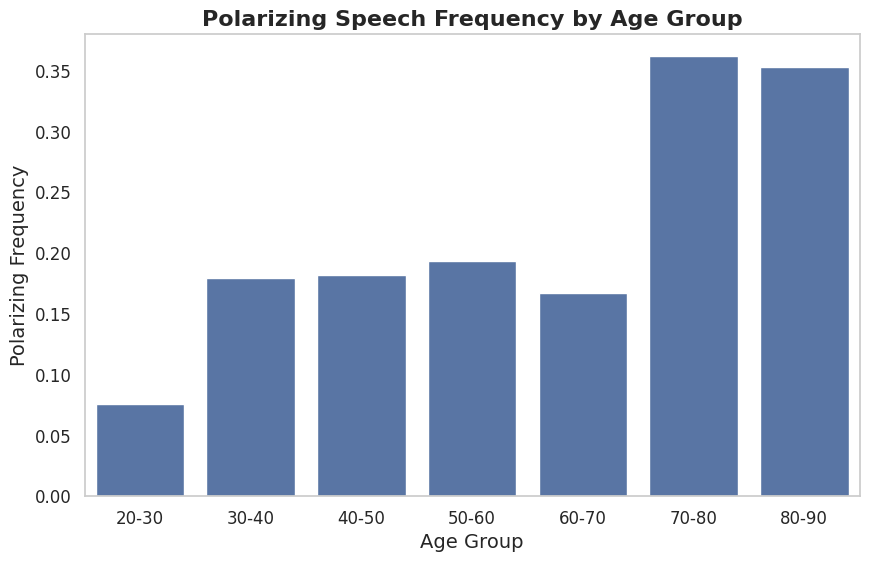

In [ ]:
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
features_with_polarization_20['age_group'] = pd.cut(features_with_polarization_20['age'], bins=bins, labels=labels, right=False)

features_with_polarization_20_age = features_with_polarization_20.groupby('age_group').agg({
    'polarizing': 'sum',
    'id': 'count'
}).reset_index()

features_with_polarization_20_age['polarizing_frequency'] = (features_with_polarization_20_age['polarizing'] / features_with_polarization_20_age['id'])

features_with_polarization_20_age = features_with_polarization_20_age.sort_values(by='polarizing_frequency', ascending=False)
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=features_with_polarization_20_age, x='age_group', y='polarizing_frequency')

plt.title("Polarizing Speech Frequency by Age Group", fontsize=16,  weight='bold')
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Polarizing Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="", alpha=0.7)
plt.show()


In [ ]:
# Print the polarizing frequency for each age group
print(features_with_polarization_20_age[['age_group', 'polarizing_frequency']])


  age_group  polarizing_frequency
5     70-80              0.361905
6     80-90              0.352941
3     50-60              0.193188
2     40-50              0.181789
1     30-40              0.179876
4     60-70              0.166950
0     20-30              0.075639


Anzahl der Politiker*innen pro Altersgruppe:
  age_group  unique_politicians
0     20-30                  47
1     30-40                 175
2     40-50                 260
3     50-60                 294
4     60-70                 156
5     70-80                  14
6     80-90                   2


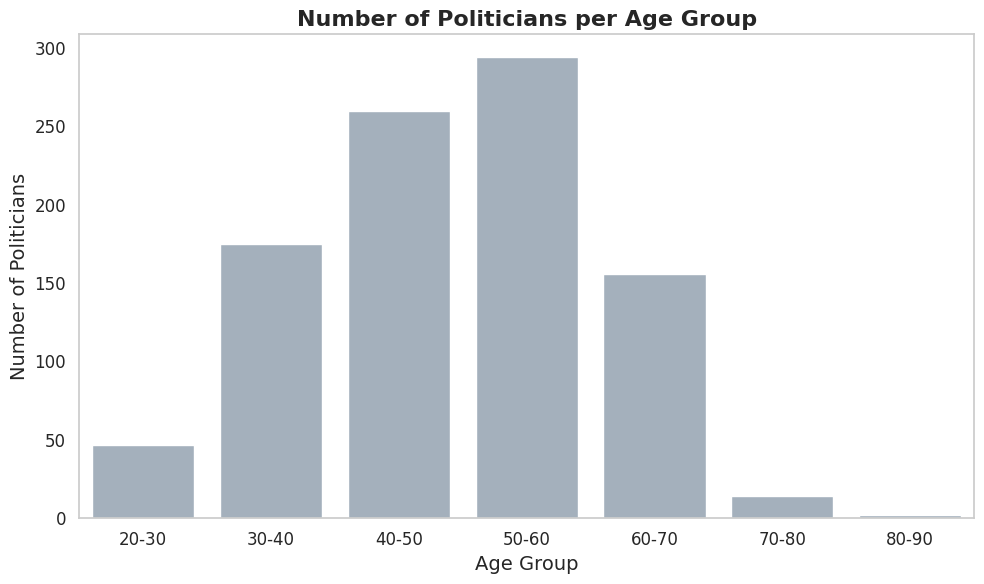

In [ ]:
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
features_with_polarization_20['age_group'] = pd.cut(features_with_polarization_20['age'], bins=bins, labels=labels, right=False)

# Berechnung der Anzahl einzigartiger Politiker*innen pro Altersgruppe
politicians_per_age_group = features_with_polarization_20.groupby('age_group')['politician_id'].nunique().reset_index()
politicians_per_age_group = politicians_per_age_group.rename(columns={'politician_id': 'unique_politicians'})

# DataFrame ausgeben
print("Anzahl der Politiker*innen pro Altersgruppe:")
print(politicians_per_age_group)

# Visualisierung
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=politicians_per_age_group, x='age_group', y='unique_politicians', color='#A0B0C0')

plt.title("Number of Politicians per Age Group", fontsize=16,  weight='bold')
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Number of Politicians", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="", alpha=0.7)
plt.tight_layout()
plt.show()


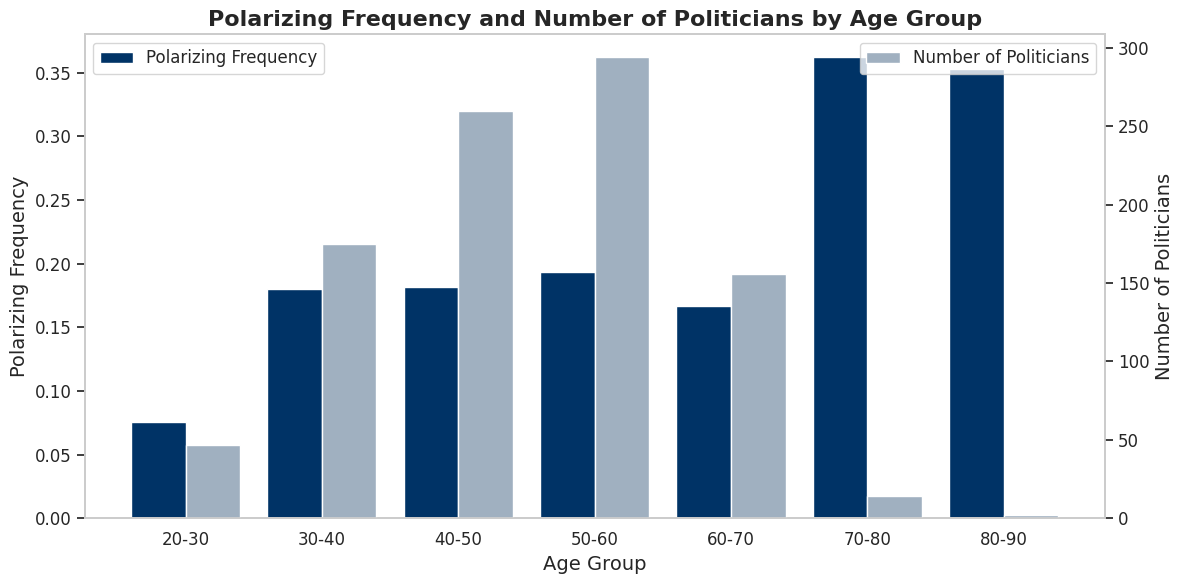

In [ ]:
# Ensure age groups are ordered correctly (youngest to oldest)
features_with_polarization_20_age['age_group'] = pd.Categorical(
    features_with_polarization_20_age['age_group'],
    categories=labels,  # Ensure age groups follow the defined order
    ordered=True
)

politicians_per_age_group['age_group'] = pd.Categorical(
    politicians_per_age_group['age_group'],
    categories=labels,
    ordered=True
)

# Sort both datasets
features_with_polarization_20_age = features_with_polarization_20_age.sort_values('age_group')
politicians_per_age_group = politicians_per_age_group.sort_values('age_group')

# Set positions for the grouped bars
x = np.arange(len(features_with_polarization_20_age['age_group']))  # Label locations
width = 0.4  # Width of each bar

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar for Polarizing Frequency on the first y-axis
bar1 = ax1.bar(x - width/2, features_with_polarization_20_age['polarizing_frequency'], width,
               label='Polarizing Frequency', color='#003366')
ax1.set_xlabel('Age Group', fontsize=14)
ax1.set_ylabel('Polarizing Frequency', fontsize=14)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(features_with_polarization_20_age['age_group'], fontsize=12)

# Create a second y-axis for the number of politicians
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, politicians_per_age_group['unique_politicians'], width,
               label='Number of Politicians', color='#A0B0C0')
ax2.set_ylabel('Number of Politicians', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)
ax1.grid(False)  # Turn off grid for the first y-axis
ax2.grid(False)  # Turn off grid for the second y-axis

sns.set_theme(style="whitegrid")

# Title and legend
plt.title('Polarizing Frequency and Number of Politicians by Age Group', fontsize=16, weight='bold')
fig.tight_layout()

# Add legends for both axes
ax1.legend([bar1], ['Polarizing Frequency'], loc='upper left', fontsize=12)
ax2.legend([bar2], ['Number of Politicians'], loc='upper right', fontsize=12)

plt.show()


In [ ]:
politicians_per_age_group

,age_group,unique_politicians
0,20-30,47
1,30-40,175
2,40-50,260
3,50-60,294
4,60-70,156
5,70-80,14
6,80-90,2


In [ ]:
# Filtere Politiker*innen mit Alter > 70
politicians_per_age_group_filtered = features_with_polarization_20[features_with_polarization_20["age"] > 80]

# Wähle die eindeutigen Politiker*innen und deren zugehörige Spalten
unique_politicians_over_70 = politicians_per_age_group_filtered.drop_duplicates(subset=['politician_id'])

pd.set_option('display.max_columns', None)
unique_politicians_over_70

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction,year,speech_length,age,gender,tenure,topic,main_category,sub_category,Stadt,Former Country,City Classification,net_sentiment_score,positivity_sentiment,negativity_sentiment,polarizing,month_year,age_group
101425,1119538,20,17,alexander,https://dip21.bundestag.de/dip21/btp/20/20017.pdf,gauland,0,Member of Parliament,None,11004724,Tagesordnungspunkt 7,a) Antrag der Fraktion der CDU/CSU: Russlands ...,Frau Präsidentin! Meine Damen und Herren! Stel...,2022-02-17,AfD,2022,2842,81.0,männlich,4.243836,No Topic,no topic,None,Chemnitz,former GDR,Large City,0.078431,0.181373,0.102941,False,2022-02,80-90
118934,1100467,20,122,albrecht,https://dip21.bundestag.de/dip21/btp/20/20122.pdf,glaser,0,Member of Parliament,None,11004727,Zusatzpunkt 4,"Antrag der Abgeordneten Christian Görke, Dr. G...",Frau Präsidentin! Meine Damen und Herren! Deut...,2023-09-21,AfD,2023,2992,81.0,männlich,5.676712,Recht & Kriminalität: Drogenpolitik,Law & Crime,Drogenpolitik,Worms,former BRD,Medium City,0.000000,0.092050,0.092050,True,2023-09,80-90


In [ ]:
pd.reset_option('display.max_columns')


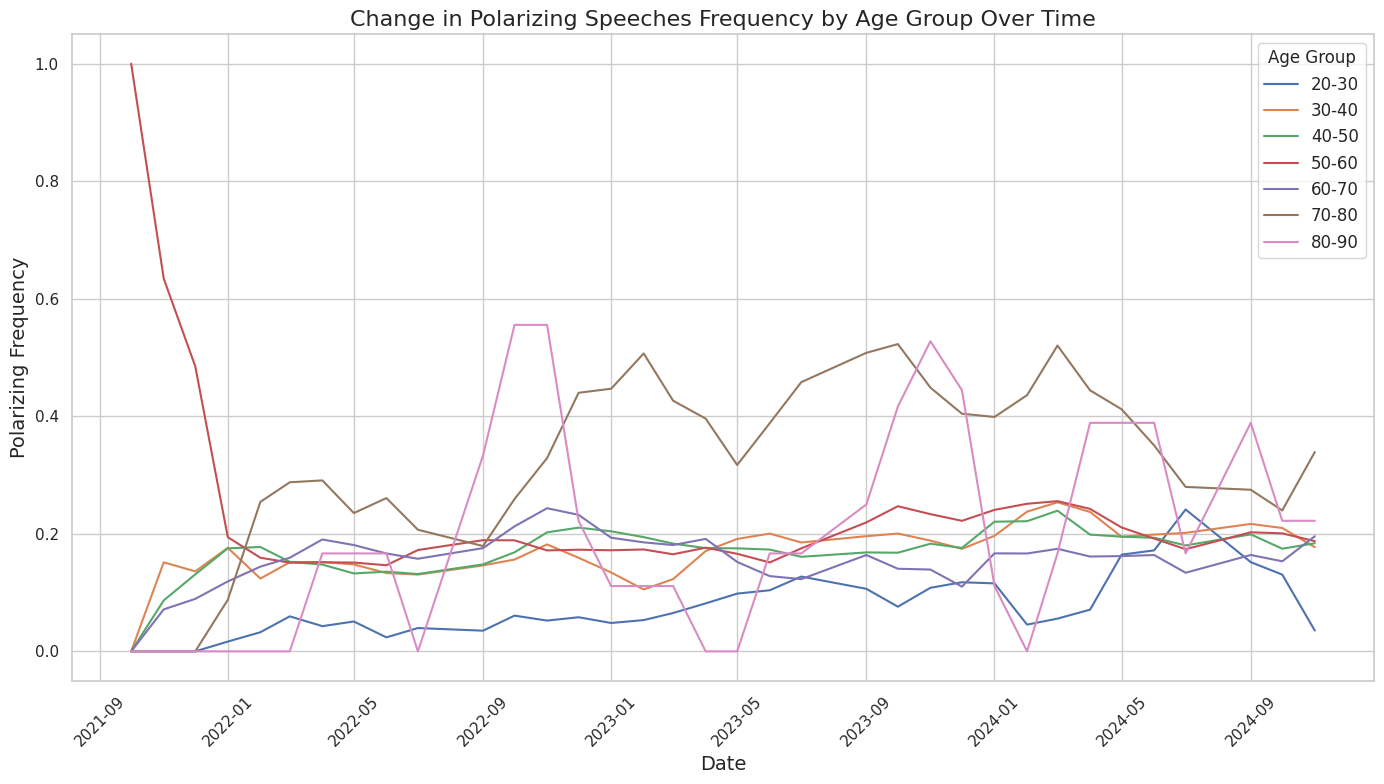

In [ ]:
features_with_polarization_20['month_year'] = pd.to_datetime(features_with_polarization_20['date']).dt.to_period('M')
features_with_polarization_20['month_year'] = features_with_polarization_20['month_year'].dt.to_timestamp()

features_with_polarization_20_age_time = features_with_polarization_20.groupby(['month_year', 'age_group']).agg({
    'polarizing': 'sum',
    'id': 'count'
}).reset_index()

features_with_polarization_20_age_time['id'] = features_with_polarization_20_age_time['id'].fillna(0)

features_with_polarization_20_age_time['polarizing_frequency_age'] = 0

mask = features_with_polarization_20_age_time['id'] > 0
features_with_polarization_20_age_time.loc[mask, 'polarizing_frequency_age'] = (
    features_with_polarization_20_age_time.loc[mask, 'polarizing'] / features_with_polarization_20_age_time.loc[mask, 'id']
)

features_with_polarization_20_age_time['polarizing_frequency_smooth'] = features_with_polarization_20_age_time.groupby('age_group')['polarizing_frequency_age'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.lineplot(data=features_with_polarization_20_age_time, x='month_year', y='polarizing_frequency_smooth', hue='age_group', marker='')

plt.title("Change in Polarizing Speeches Frequency by Age Group Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Polarizing Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Age Group', fontsize=12)
plt.tight_layout()

plt.show()


# 7.Impact of Political Experience on Polarization

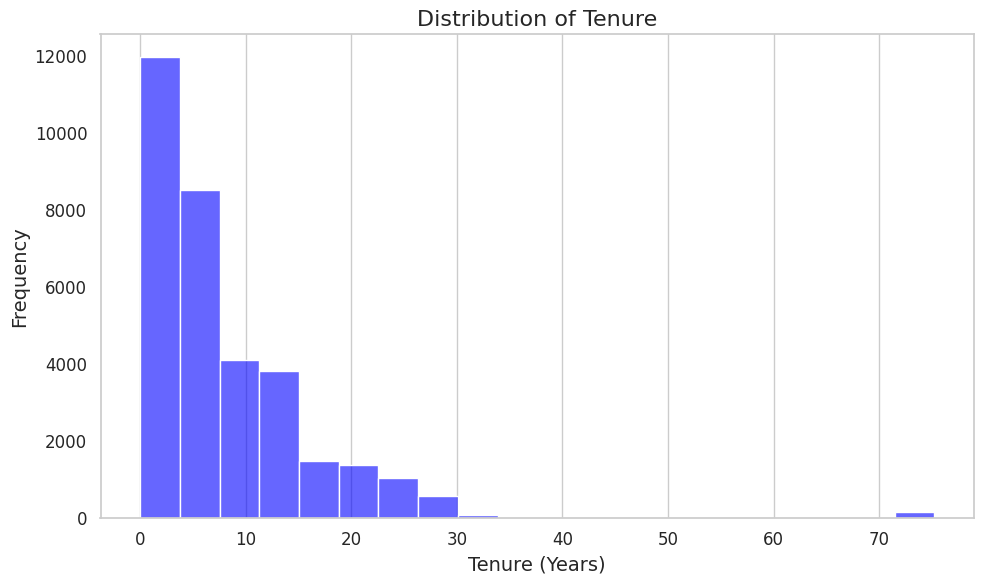

In [ ]:
# plot distribution
features_with_polarization_20_tenure = features_with_polarization_20[['tenure', 'polarizing', 'speech_length', 'id']]
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Histogramm mit KDE
sns.histplot(data=features_with_polarization_20_tenure, x='tenure', bins=20, color='blue', alpha=0.6)

# Titel und Achsenbeschriftungen anpassen
plt.title("Distribution of Tenure", fontsize=16)
plt.xlabel("Tenure (Years)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="", alpha=0.7)

# Plot anzeigen
plt.tight_layout()
plt.show()

In [ ]:
features_with_polarization_20_tenure

,tenure,polarizing,speech_length,id
100032,7.706849,False,100,1066957
100033,7.706849,False,2425,1066959
100034,18.983562,False,3727,1066961
100035,15.783562,False,4241,1066963
100036,11.750685,False,4498,1066965
...,...,...,...,...
133159,2.802740,True,2942,1094067
133160,10.627397,True,4771,1094069
133161,14.734247,False,3476,1094071
133162,10.690411,True,4699,1094073


In [ ]:
# remove outliers

features_with_polarization_20_tenure_cleaned = features_with_polarization_20_tenure[features_with_polarization_20_tenure["tenure"] < 70]

In [ ]:
features_with_polarization_20_tenure_cleaned = features_with_polarization_20_tenure_cleaned.groupby('tenure').agg({
    'polarizing': 'sum',
    'id': 'count'
}).reset_index()

features_with_polarization_20_tenure_cleaned['polarizing_frequency'] = features_with_polarization_20_tenure_cleaned['polarizing'] / features_with_polarization_20_tenure_cleaned['id']

correlation = features_with_polarization_20_tenure_cleaned[['tenure', 'polarizing_frequency']].corr(method='pearson')

print("Pearson correlation between tenure and polarizing_frequency:")
print(correlation)

Pearson correlation between tenure and polarizing_frequency:
                        tenure  polarizing_frequency
tenure                1.000000             -0.053046
polarizing_frequency -0.053046              1.000000


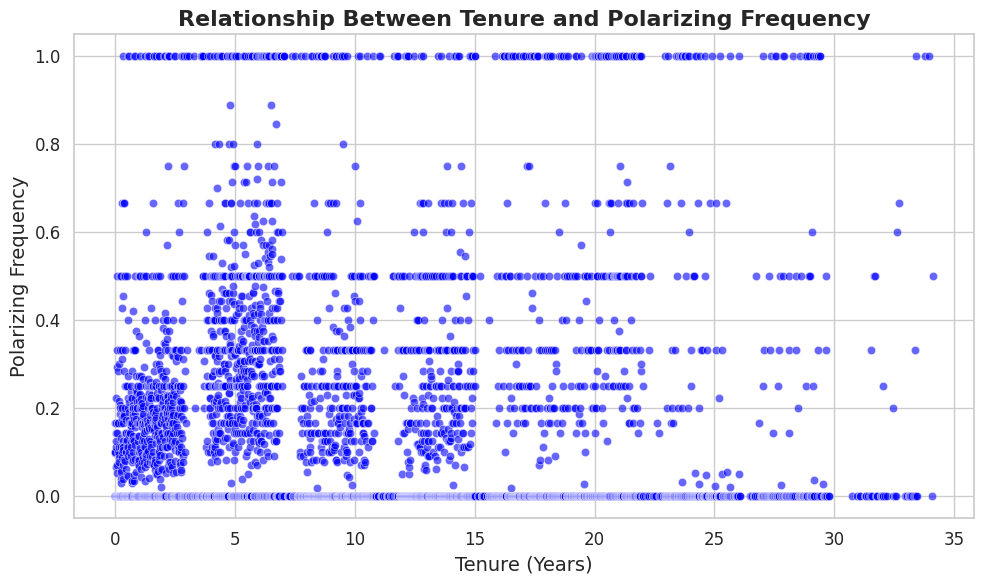

In [ ]:
sns.set_theme(style="whitegrid")

# Erstellen eines Streudiagramms von Tenure vs. Polarizing Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features_with_polarization_20_tenure_cleaned, x='tenure', y='polarizing_frequency', color='blue', alpha=0.6)

# Hinzufügen einer linearen Regression zur Darstellung des Zusammenhangs
#sns.regplot(data=features_with_polarization_20_tenure_cleaned, x='tenure', y='polarizing_frequency', scatter=False, color='red')

# Titel und Achsenbeschriftungen anpassen
plt.title("Relationship Between Tenure and Polarizing Frequency", fontsize=16,  weight='bold')
plt.xlabel("Tenure (Years)", fontsize=14)
plt.ylabel("Polarizing Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Plot anzeigen
plt.tight_layout()
plt.show()


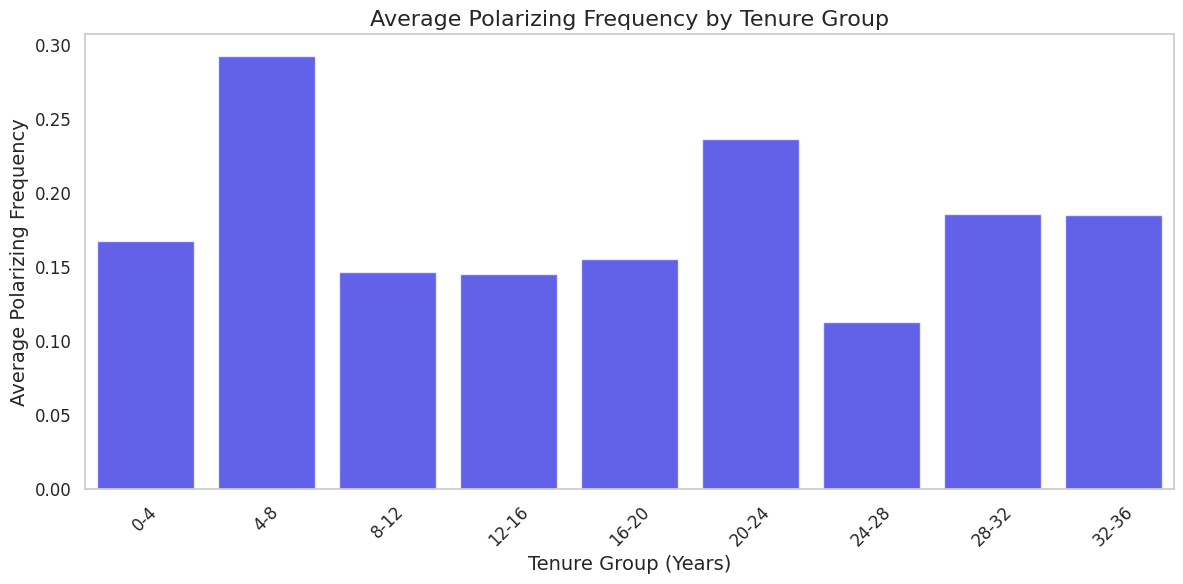

In [ ]:
bins = range(0, int(features_with_polarization_20_tenure_cleaned['tenure'].max()) + 4, 4)
labels = [f"{i}-{i+4}" for i in bins[:-1]]
features_with_polarization_20_tenure_cleaned['tenure_group'] = pd.cut(features_with_polarization_20_tenure_cleaned['tenure'], bins=bins, labels=labels, right=False)

avg_polarization_per_group = features_with_polarization_20_tenure_cleaned.groupby('tenure_group')['polarizing_frequency'].mean().reset_index()
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_polarization_per_group, x='tenure_group', y='polarizing_frequency', color='blue', alpha=0.7)

plt.title("Average Polarizing Frequency by Tenure Group", fontsize=16)
plt.xlabel("Tenure Group (Years)", fontsize=14)
plt.ylabel("Average Polarizing Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="", alpha=0.7)

plt.tight_layout()
plt.show()


# 8. Polarizing Topics

In [ ]:
features_with_polarization_20["main_category"].unique()

array(['no topic', 'Domestic Trade', 'Law & Crime', 'Work',
       'Public Administration', 'Civil Rights', 'Healthcare', 'Transport',
       'Agriculture', 'Defense Policy', 'Energy', 'Technology',
       'Environment', 'Social Policy', 'Housing', 'Sports', 'Economy',
       'Education', 'Foreign Policy', 'Foreign Trade', nan,
       'Reunification'], dtype=object)

In [ ]:
features_with_polarization_20["sub_category"].unique()

array([None, ' Verbraucherschutz', ' Korruption & Lobbyismus', ' Flug',
       ' Mindestlohn', ' Innerdeutscher Terrorismus', ' Tierschutz',
       ' Digitalisierung', ' Geringverdiener', ' Fossile Energie',
       ' Erneuerbare Energie', ' Bürger:innenversicherunng',
       ' Nahrungsmittel', ' Atommüll & Chemische Giftstoff', ' Haushalt',
       ' Datenschutz', ' Kinder & Jugenhilfe', ' Sexualstrafrecht',
       ' Familienangelegenheiten', ' Mittelstand', ' Dieselskandal',
       ' Bahn', ' Covid19', ' Entwicklungspolitik', ' Nachkriegsordnung',
       ' Ost-West Konflikt', ' Naher Osten', ' Europa',
       ' Klima- & Umweltschutz', ' Wirtschaftskriminalität', ' Schule',
       ' Steuern', ' Globalisierung & Weltwirtschaft', ' Rundfunk', nan,
       ' Drogenpolitik', ' Hochschule & Universität',
       ' Leih- & Zeitarbeit', ' Rüstungskontrolle', ' Forschung',
       ' Flucht, Asyl & Einbürgerung', ' Handelsabkommen',
       ' Polizei & Grenzschutz', ' Schifffahrt', ' Föderalismus'

In [ ]:
features_with_polarization_20["topic"].unique()

array(['No Topic', 'Binnenhandel: Verbraucherschutz',
       'Recht & Kriminalität', 'Arbeit',
       'Öffentliche Verwaltun: Korruption & Lobbyismus',
       'BürgerInnenrechte', 'Gesundheitswesen', 'Transport: Flug',
       'Arbeit: Mindestlohn',
       'Recht & Kriminalität: Innerdeutscher Terrorismus',
       'Landwirtschaft: Tierschutz', 'Verteidigungspolitik', 'Energie',
       'Technologie: Digitalisierung', 'Umwelt', 'Landwirtschaft',
       'Sozialpolitik: Geringverdiener', 'Energie: Fossile Energie',
       'Energie: Erneuerbare Energie', 'Wohnungswesen', 'Sport',
       'Öffentliche Verwaltung',
       'Sozialpolitik: Bürger:innenversicherunng',
       'Landwirtschaft: Nahrungsmittel',
       'Umwelt: Atommüll & Chemische Giftstoff',
       'Volkswirtschaft: Haushalt', 'BürgerInnenrechte: Datenschutz',
       'Sozialpolitik: Kinder & Jugenhilfe',
       'Recht & Kriminalität: Sexualstrafrecht',
       'Recht & Kriminalität: Familienangelegenheiten',
       'Binnenhandel

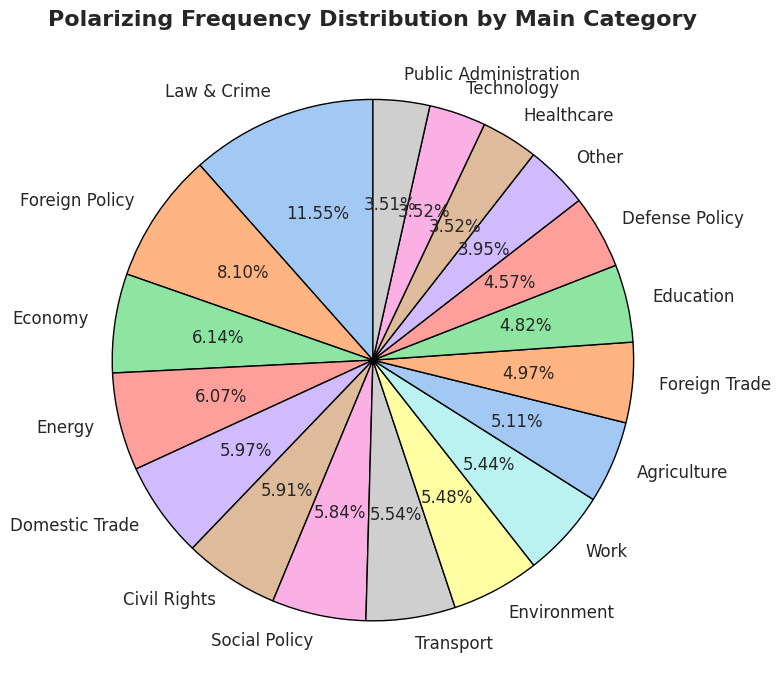

In [ ]:
# Berechnung der Polarizing Frequency für jede main_category
features_with_polarization_20['month_year'] = pd.to_datetime(features_with_polarization_20['date']).dt.to_period('M').dt.to_timestamp()

features_with_polarization_20_filtered = features_with_polarization_20[features_with_polarization_20["topic"] != "No Topic"]

features_with_polarization_20_main_category = features_with_polarization_20_filtered.groupby(['month_year', 'topic', 'main_category']).agg({'polarizing': 'sum', 'id': 'count'}).reset_index()

features_with_polarization_20_main_category['polarizing_frequency'] = features_with_polarization_20_main_category['polarizing'] / features_with_polarization_20_main_category['id']

# Berechne die Summe der 'polarizing_frequency' für jede main_category
category_polarizing_sum = features_with_polarization_20_main_category.groupby('main_category')['polarizing_frequency'].sum().reset_index()

# Berechne die Gesamt-Summe der 'polarizing_frequency', um Prozentsatz zu berechnen
total_polarizing_frequency = category_polarizing_sum['polarizing_frequency'].sum()

# Berechne den Prozentsatz für jede Kategorie
category_polarizing_sum['percentage'] = (category_polarizing_sum['polarizing_frequency'] / total_polarizing_frequency) * 100

# Kategorien, die weniger als 4% ausmachen, zusammenfassen
other_category = category_polarizing_sum[category_polarizing_sum['percentage'] < 3]
other_category_sum = other_category['polarizing_frequency'].sum()

# Alle Kategorien, die mehr als 4% ausmachen
top_categories = category_polarizing_sum[category_polarizing_sum['percentage'] >= 3]

# Füge "Other" zu den Top-Kategorien hinzu
other_row = pd.DataFrame({'main_category': ['Other'],
                          'polarizing_frequency': [other_category_sum],
                          'percentage': [other_category_sum / total_polarizing_frequency * 100]})

# Kombiniere die Top-Kategorien mit der "Other"-Kategorie
top_categories = pd.concat([top_categories, other_row], ignore_index=True)

# Sortiere die Kategorien nach der 'polarizing_frequency' in absteigender Reihenfolge
top_categories = top_categories.sort_values(by='polarizing_frequency', ascending=False)

# Visualisierung als Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_categories['polarizing_frequency'],
        labels=top_categories['main_category'],
        autopct='%1.2f%%',  # Prozentanzeige
        startangle=90,
        colors=sns.color_palette("pastel", len(top_categories)),
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 12})  # Textformatierung

plt.title("Polarizing Frequency Distribution by Main Category", fontsize=16,  weight='bold')
plt.tight_layout()
plt.show()


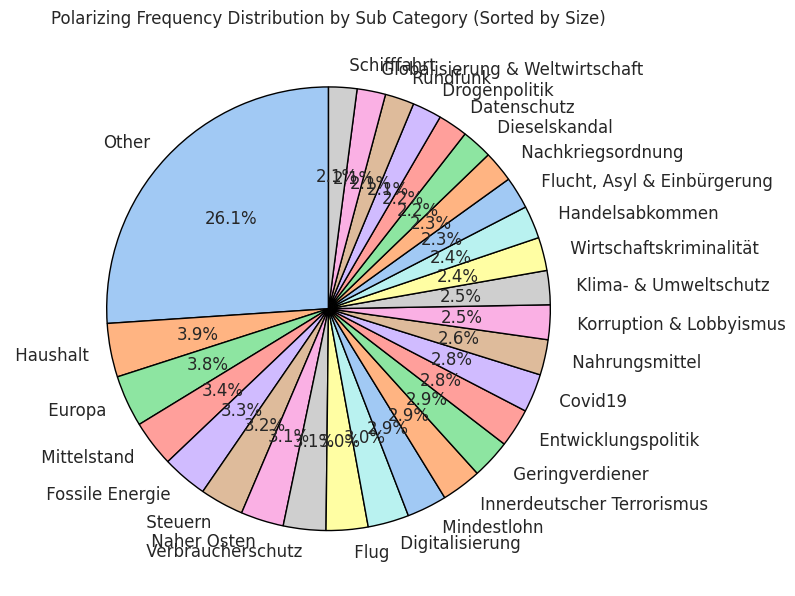

In [ ]:
# Berechnung der Polarizing Frequency für jede sub_category
features_with_polarization_20['month_year'] = pd.to_datetime(features_with_polarization_20['date']).dt.to_period('M').dt.to_timestamp()

# Entfernen der Zeilen mit "No Topic"
features_with_polarization_20_filtered = features_with_polarization_20[features_with_polarization_20["topic"] != "No Topic"]

# Gruppiere nach 'month_year', 'topic' und 'sub_category'
features_with_polarization_20_sub_category = features_with_polarization_20_filtered.groupby(['month_year', 'topic', 'sub_category']).agg({'polarizing': 'sum', 'id': 'count'}).reset_index()

# Berechne die polarizing_frequency für jede sub_category
features_with_polarization_20_sub_category['polarizing_frequency'] = features_with_polarization_20_sub_category['polarizing'] / features_with_polarization_20_sub_category['id']

# Berechne die Summe der 'polarizing_frequency' für jede sub_category
category_polarizing_sum_sub = features_with_polarization_20_sub_category.groupby('sub_category')['polarizing_frequency'].sum().reset_index()

# Berechne die Gesamt-Summe der 'polarizing_frequency', um den Prozentsatz zu berechnen
total_polarizing_frequency_sub = category_polarizing_sum_sub['polarizing_frequency'].sum()

# Berechne den Prozentsatz für jede sub_category
category_polarizing_sum_sub['percentage'] = (category_polarizing_sum_sub['polarizing_frequency'] / total_polarizing_frequency_sub) * 100

# Kategorien, die weniger als 4% ausmachen, zusammenfassen
other_category_sub = category_polarizing_sum_sub[category_polarizing_sum_sub['percentage'] < 2]
other_category_sum_sub = other_category_sub['polarizing_frequency'].sum()

# Alle Kategorien, die mehr als 4% ausmachen
top_categories_sub = category_polarizing_sum_sub[category_polarizing_sum_sub['percentage'] >= 2]

# Füge "Other" zu den Top-Kategorien hinzu
other_row_sub = pd.DataFrame({'sub_category': ['Other'],
                              'polarizing_frequency': [other_category_sum_sub],
                              'percentage': [other_category_sum_sub / total_polarizing_frequency_sub * 100]})

# Kombiniere die Top-Kategorien mit der "Other"-Kategorie
top_categories_sub = pd.concat([top_categories_sub, other_row_sub], ignore_index=True)

# Sortiere die Kategorien nach der 'polarizing_frequency' in absteigender Reihenfolge
top_categories_sub = top_categories_sub.sort_values(by='polarizing_frequency', ascending=False)

# Visualisierung als Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_categories_sub['polarizing_frequency'],
        labels=top_categories_sub['sub_category'],
        autopct='%1.1f%%',  # Prozentanzeige
        startangle=90,
        colors=sns.color_palette("pastel", len(top_categories_sub)),
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 12})  # Textformatierung

plt.title("Polarizing Frequency Distribution by Sub Category (Sorted by Size)")
plt.tight_layout()
plt.show()


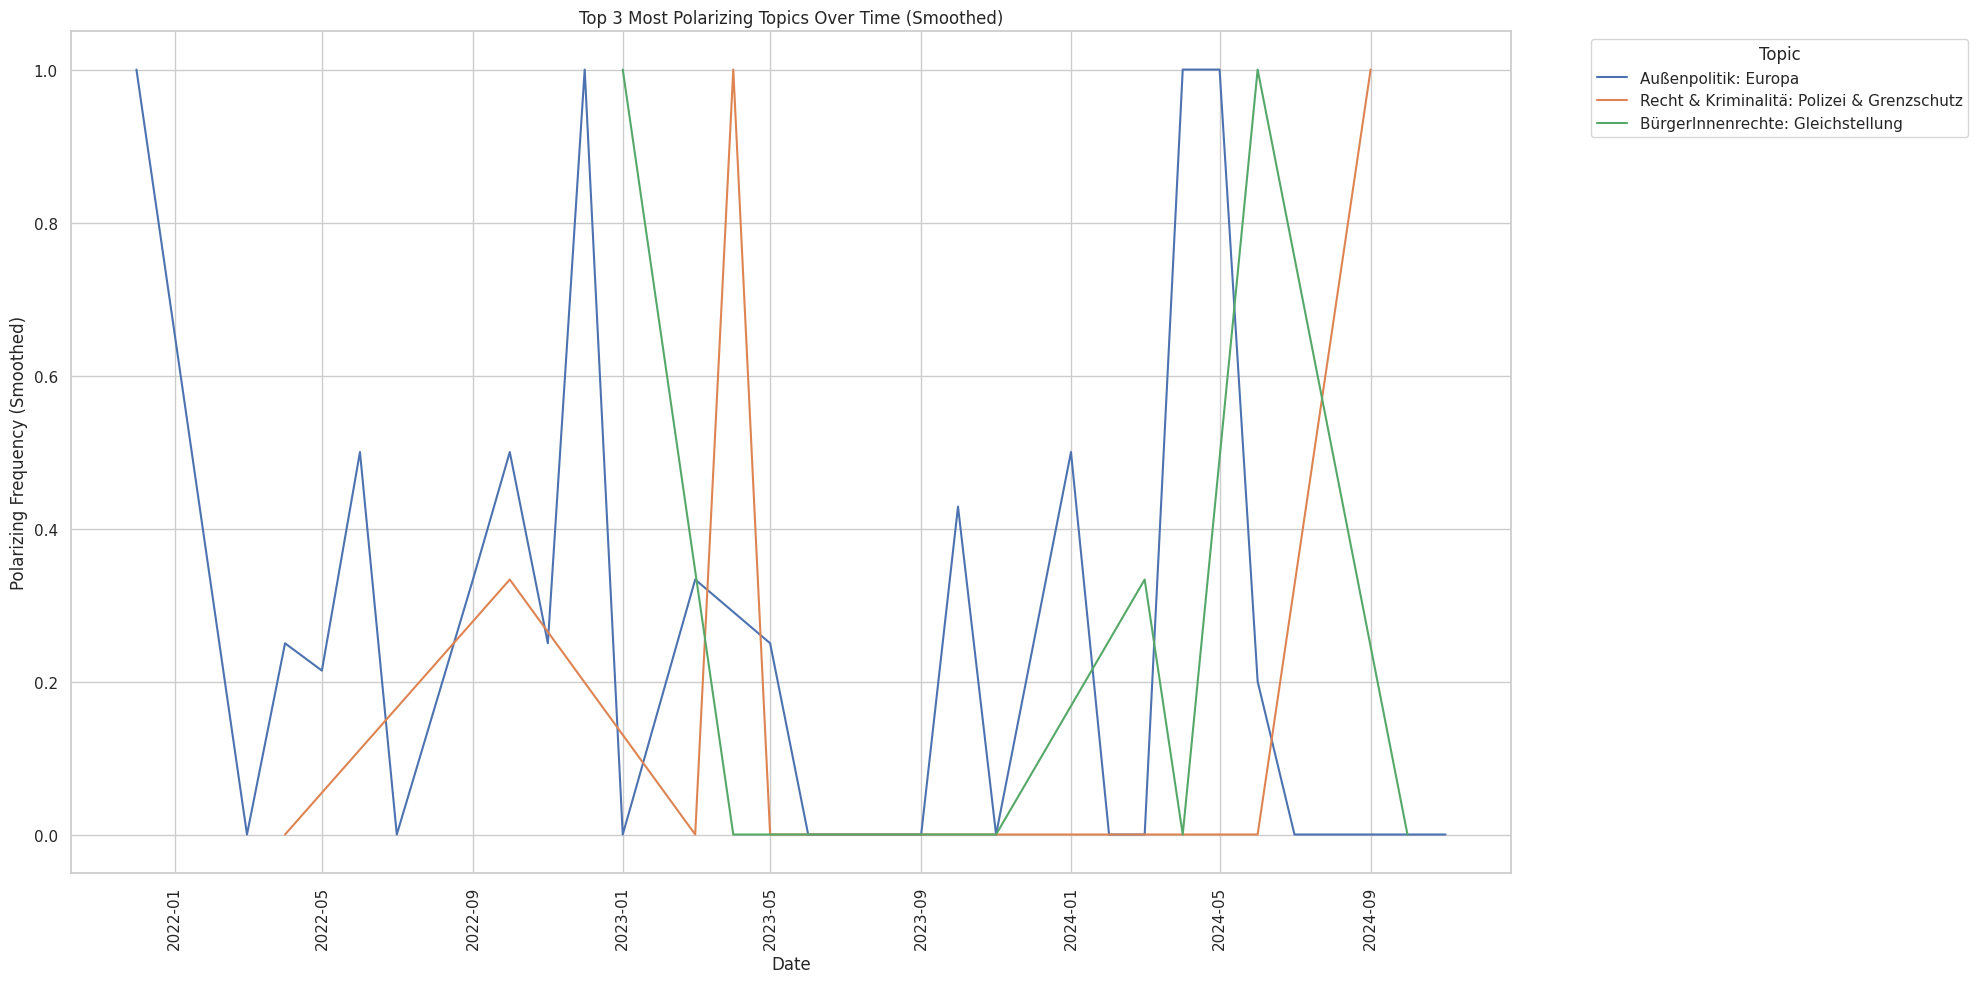

In [ ]:
features_with_polarization_20['month_year'] = pd.to_datetime(features_with_polarization_20['date']).dt.to_period('M').dt.to_timestamp()

# Filter out rows with "No Topic"
features_with_polarization_20_filtered = features_with_polarization_20[features_with_polarization_20["topic"] != "No Topic"]

# Group by 'month_year' and 'topic' to calculate polarizing_frequency
features_with_polarization_20_topic = features_with_polarization_20_filtered.groupby(['month_year', 'topic']).agg({'polarizing': 'sum', 'id': 'count'}).reset_index()
features_with_polarization_20_topic['polarizing_frequency'] = features_with_polarization_20_topic['polarizing'] / features_with_polarization_20_topic['id']

# Ensure 'polarizing_frequency' is numeric
features_with_polarization_20_topic = features_with_polarization_20_topic.dropna(subset=['polarizing_frequency'])
features_with_polarization_20_topic['polarizing_frequency'] = pd.to_numeric(features_with_polarization_20_topic['polarizing_frequency'], errors='coerce')

# Compute the average polarizing frequency for each topic
avg_polarizing_frequency = features_with_polarization_20_topic.groupby('topic')['polarizing_frequency'].mean()

# Get the 3 most polarizing topics
top_3_topics_names = avg_polarizing_frequency.nlargest(3).index

# Filter data for the top 3 topics
top_3_topics = features_with_polarization_20_topic[features_with_polarization_20_topic['topic'].isin(top_3_topics_names)]

# Smooth the polarizing frequency using a rolling window
top_3_topics['polarizing_frequency_smooth'] = top_3_topics.groupby('topic')['polarizing_frequency'].transform(lambda x: x.rolling(window=1, min_periods=1).mean())

# Plot the smoothed trends
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))
sns.lineplot(data=top_3_topics, x='month_year', y='polarizing_frequency_smooth', hue='topic')
plt.title("Top 3 Most Polarizing Topics Over Time (Smoothed)")
plt.xlabel("Date")
plt.ylabel("Polarizing Frequency (Smoothed)")
plt.xticks(rotation=90)
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
average_polarizing_frequency_all_time = top_3_topics.groupby('topic')['polarizing_frequency'].mean()

print(average_polarizing_frequency_all_time)


topic
Außenpolitik: Europa                           0.287390
BürgerInnenrechte: Gleichstellung              0.333333
Recht & Kriminalitä: Polizei & Grenzschutz    0.291667
Name: polarizing_frequency, dtype: float64


In [ ]:
features_with_polarization_20['month_year'] = pd.to_datetime(features_with_polarization_20['date']).dt.to_period('M').dt.to_timestamp()

# Filter out rows with "No Topic"
features_with_polarization_20_filtered = features_with_polarization_20[features_with_polarization_20["topic"] != "No Topic"]

# Identify the first and last year in the data
first_year = features_with_polarization_20_filtered['month_year'].min().year
last_year = features_with_polarization_20_filtered['month_year'].max().year

# Extract data for the first and last year
data_first_year = features_with_polarization_20_filtered[features_with_polarization_20_filtered['month_year'].dt.year == first_year]
data_last_year = features_with_polarization_20_filtered[features_with_polarization_20_filtered['month_year'].dt.year == last_year]

# Group by topic and calculate polarizing frequency for each year
data_first_year = data_first_year.groupby('topic').agg({'polarizing': 'sum', 'id': 'count'}).reset_index()
data_first_year['polarizing_frequency'] = data_first_year['polarizing'] / data_first_year['id']

data_last_year = data_last_year.groupby('topic').agg({'polarizing': 'sum', 'id': 'count'}).reset_index()
data_last_year['polarizing_frequency'] = data_last_year['polarizing'] / data_last_year['id']

# Ensure 'polarizing_frequency' is numeric
data_first_year['polarizing_frequency'] = pd.to_numeric(data_first_year['polarizing_frequency'], errors='coerce')
data_last_year['polarizing_frequency'] = pd.to_numeric(data_last_year['polarizing_frequency'], errors='coerce')

# Calculate average polarizing frequency for each topic
avg_polarizing_first_year = data_first_year.set_index('topic')['polarizing_frequency']
avg_polarizing_last_year = data_last_year.set_index('topic')['polarizing_frequency']

# Find the top 3 polarizing topics for each year
top_3_first_year = avg_polarizing_first_year.nlargest(3)
top_3_last_year = avg_polarizing_last_year.nlargest(3)

print("Top 3 Most Polarizing Topics in the First Year:")
print(top_3_first_year)
print("\nTop 3 Most Polarizing Topics in the Last Year:")
print(top_3_last_year)

# Combine results into a single DataFrame for comparison
top_3_comparison = pd.DataFrame({
    'First Year': top_3_first_year,
    'Last Year': top_3_last_year
}).reset_index()


Top 3 Most Polarizing Topics in the First Year:
topic
Außenpolitik: Europa             1.0
Umwelt: Klima- & Umweltschutz    1.0
Umwelt                           0.5
Name: polarizing_frequency, dtype: float64

Top 3 Most Polarizing Topics in the Last Year:
topic
Außenpolitik                                0.500000
Sozialpolitik: Bürger:innenversicherunng    0.500000
Transport: Schifffahrt                      0.444444
Name: polarizing_frequency, dtype: float64


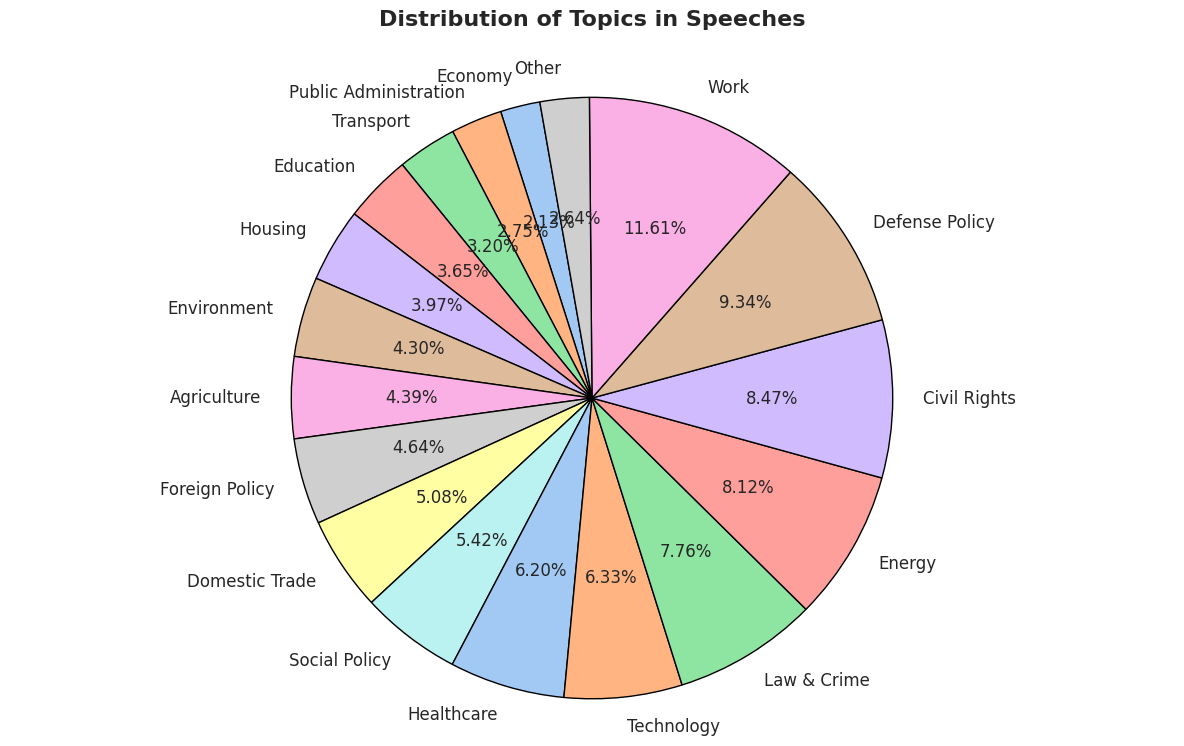

In [ ]:
# Filter out "no topic" and calculate category percentages
speeches_with_sentiment_topics_without_no_topic = features_with_polarization_20[features_with_polarization_20['main_category'] != 'no topic']
category_counts = speeches_with_sentiment_topics_without_no_topic['main_category'].value_counts()
total_count = category_counts.sum()

# Group categories with less than 2% into "Other"
threshold = 0.02 * total_count  # Threshold for grouping
category_counts_grouped = category_counts.copy()
category_counts_grouped['Other'] = category_counts_grouped[category_counts_grouped < threshold].sum()
category_counts_grouped = category_counts_grouped[category_counts_grouped >= threshold]

# Place "Other" at the end
category_counts_grouped = category_counts_grouped.sort_values(ascending=True)
if 'Other' in category_counts_grouped.index:
    other_value = category_counts_grouped['Other']
    category_counts_grouped = category_counts_grouped.drop('Other')
    category_counts_grouped['Other'] = other_value

# Labels for the pie chart
labels = category_counts_grouped.index

# Plot the pie chart
plt.figure(figsize=(12, 8))
colors = sns.color_palette('pastel', len(category_counts_grouped))  # Use a pastel color palette
wedges, texts, autotexts = plt.pie(
    category_counts_grouped,
    labels=labels,
    autopct='%1.2f%%',
    startangle=100,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},  # Add black borders for better separation
    textprops={'fontsize': 12}  # Adjust text size for readability
)

# Add a title and styling
plt.title('Distribution of Topics in Speeches', fontsize=16, weight='bold', y=1.05)  # Add more space between the title and the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent label/title overlap

# save plot
plt.savefig('topic_distribution.png', dpi=300)
# Show the plot
plt.show()

In [ ]:
# Berechnung der Anzahl polarizing und non-polarizing Reden pro Kategorie
category_polarization_split = features_with_polarization_20.groupby(['main_category', 'polarizing']).agg({'id': 'count'}).reset_index()

# Umbenennen der Spalten für Klarheit
category_polarization_split.rename(columns={'id': 'speech_count'}, inplace=True)

# Gesamte Anzahl an Reden pro Kategorie berechnen
total_speeches_per_category = category_polarization_split.groupby('main_category')['speech_count'].sum().reset_index()
total_speeches_per_category.rename(columns={'speech_count': 'total_speeches'}, inplace=True)

# Merge: Anteil pro Kategorie berechnen
category_polarization_split = pd.merge(category_polarization_split, total_speeches_per_category, on='main_category')
category_polarization_split['percentage'] = (category_polarization_split['speech_count'] / category_polarization_split['total_speeches']) * 100

# Pivot-Tabelle erstellen für besseren Überblick (optional)
polarization_table = category_polarization_split.pivot(index='main_category', columns='polarizing', values=['speech_count', 'percentage']).fillna(0)

# Spalten umbenennen für Lesbarkeit
polarization_table.columns = ['non_polarizing_count', 'polarizing_count', 'non_polarizing_percentage', 'polarizing_percentage']
polarization_table = polarization_table.reset_index()

# Sortieren nach dem Anteil der polarizing Speeches
polarization_table = polarization_table.sort_values(by='polarizing_percentage', ascending=False)

# Tabelle anzeigen
polarization_table


,main_category,non_polarizing_count,polarizing_count,non_polarizing_percentage,polarizing_percentage
6,Energy,939.0,263.0,78.119800,21.880200
4,Economy,251.0,65.0,79.430380,20.569620
1,Civil Rights,1001.0,254.0,79.760956,20.239044
3,Domestic Trade,605.0,148.0,80.345286,19.654714
9,Foreign Trade,165.0,40.0,80.487805,19.512195
8,Foreign Policy,553.0,134.0,80.494905,19.505095
2,Defense Policy,1125.0,258.0,81.344902,18.655098
20,no topic,13239.0,2974.0,81.656695,18.343305
0,Agriculture,531.0,119.0,81.692308,18.307692
12,Law & Crime,940.0,209.0,81.810270,18.189730


In [ ]:
# Filter für die Top 10 Kategorien mit dem höchsten Anteil an polarizing Speeches
top_10_polarized_categories = polarization_table.head(10)

# Tabelle anzeigen
top_10_polarized_categories


,main_category,non_polarizing_count,polarizing_count,non_polarizing_percentage,polarizing_percentage
6,Energy,939.0,263.0,78.119800,21.880200
4,Economy,251.0,65.0,79.430380,20.569620
1,Civil Rights,1001.0,254.0,79.760956,20.239044
3,Domestic Trade,605.0,148.0,80.345286,19.654714
9,Foreign Trade,165.0,40.0,80.487805,19.512195
8,Foreign Policy,553.0,134.0,80.494905,19.505095
2,Defense Policy,1125.0,258.0,81.344902,18.655098
20,no topic,13239.0,2974.0,81.656695,18.343305
0,Agriculture,531.0,119.0,81.692308,18.307692
12,Law & Crime,940.0,209.0,81.810270,18.189730


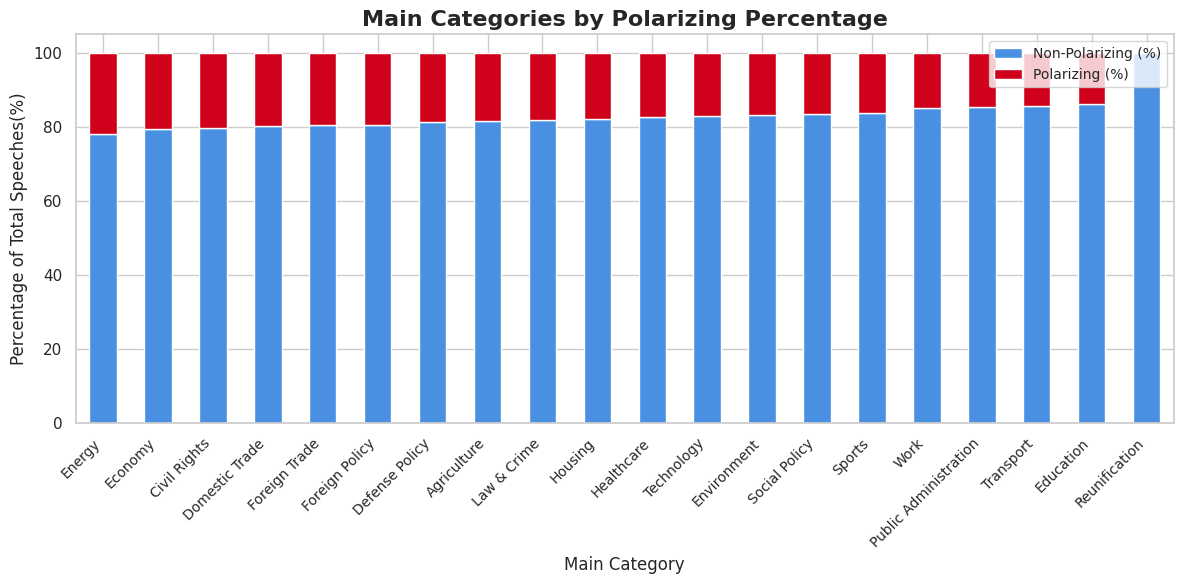

In [ ]:
polarized_categories_filtered = polarization_table[polarization_table["main_category"] != "no topic"]

top_10_polarized_categories = polarized_categories_filtered.sort_values(by='polarizing_percentage', ascending=False)

# Setze die Hauptkategorien als Index
top_10_polarized_categories.set_index('main_category', inplace=True)

# Erstelle das gestapelte Balkendiagramm mit Blau und Rot
colors = sns.color_palette("muted", 10)  # Palette mit mehreren Farben
blue = "#4A90E2"  # Blau für non-polarizing
red = "#D0021B"   # Rot für polarizing

top_10_polarized_categories[['non_polarizing_percentage', 'polarizing_percentage']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[blue, red],  # Blau für non-polarizing, Rot für polarizing
)

# Diagramm-Details hinzufügen
sns.set_theme(style="whitegrid")
plt.title('Main Categories by Polarizing Percentage', fontsize=16, weight='bold')
plt.ylabel('Percentage of Total Speeches(%)', fontsize=12)
plt.xlabel('Main Category', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(['Non-Polarizing (%)', 'Polarizing (%)'], fontsize=10)
plt.tight_layout()

# Diagramm anzeigen
plt.show()
